In [18]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
from math import exp, factorial # funções matemáticas 'exp' e 'factorial'
import statsmodels.api as sm # estimação de modelos
import statsmodels.formula.api as smf # estimação de modelos de contagem
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from scipy import stats # estatística chi2


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Estabelecendo uma função da distribuição binomial negativa para determinados
# valores de theta e delta
# theta: parâmetro de forma da distribuição Poisson-Gama (binomial negativa)
# delta: parâmetro de taxa de decaimento da distribuição Poisson-Gama

def bneg(theta, delta, m):
    return ((delta ** theta) * (m ** (theta - 1)) * (exp(-m * delta))) / factorial(theta - 1)

In [3]:
# Plotagem das funções estabelecidas para diferentes valores de
# theta e delta

m = np.arange(1,21)

bneg_theta2_delta2 = []
bneg_theta3_delta1 = []
bneg_theta3_delta05 = []

for item in m:
    # Estabelecendo a distribuição binomial negativa com theta=2 e delta=2
    bneg_theta2_delta2.append(bneg(2,2,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=1
    bneg_theta3_delta1.append(bneg(3,1,item))
    # Estabelecendo a distribuição binomial negativa com theta=3 e delta=0.5
    bneg_theta3_delta05.append(bneg(3,0.5,item))
   
# Criando um dataframe com m variando de 1 a 20 e diferentes valores de
#theta e delta
df_bneg = pd.DataFrame({'m':m,
                        'bneg_theta2_delta2':bneg_theta2_delta2,
                        'bneg_theta3_delta1':bneg_theta3_delta1,
                        'bneg_theta3_delta05':bneg_theta3_delta05})

df_bneg

,m,bneg_theta2_delta2,bneg_theta3_delta1,bneg_theta3_delta05
0,1,5.413411e-01,1.839397e-01,0.037908
1,2,1.465251e-01,2.706706e-01,0.091970
2,3,2.974503e-02,2.240418e-01,0.125511
3,4,5.367402e-03,1.465251e-01,0.135335
4,5,9.079986e-04,8.422434e-02,0.128258
5,6,1.474611e-04,4.461754e-02,0.112021
6,7,2.328280e-05,2.234111e-02,0.092479
7,8,3.601126e-06,1.073480e-02,0.073263
8,9,5.482793e-07,4.998097e-03,0.056239
9,10,8.244614e-08,2.269996e-03,0.042112


In [ ]:
# Plotagem propriamente dita

def smooth_line_plot(x,y):
    x_new = np.linspace(x.min(), x.max(),500)
    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)
    return x_new, y_smooth

x_new, bneg_theta2_delta2 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta2_delta2)
x_new, bneg_theta3_delta1 = smooth_line_plot(df_bneg.m,
                                             df_bneg.bneg_theta3_delta1)
x_new, bneg_theta3_delta05 = smooth_line_plot(df_bneg.m,
                                              df_bneg.bneg_theta3_delta05)

plt.figure(figsize=(15,10))
plt.plot(x_new,bneg_theta2_delta2, linewidth=5, color='#440154FF')
plt.plot(x_new,bneg_theta3_delta1, linewidth=5, color='#22A884FF')
plt.plot(x_new,bneg_theta3_delta05, linewidth=5, color='#FDE725FF')
plt.xlabel('m', fontsize=20, style='italic')
plt.ylabel('Probabilidades', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend([r'$\theta$ = 2 e $\delta$ = 2',
            r'$\theta$ = 3 e $\delta$ = 1',
            r'$\theta$ = 3 e $\delta$ = 0.5'],
           fontsize=24)
plt.show

In [5]:
# Fisman, R.; Miguel, E. Corruption, Norms, and Legal Enforcement: Evidence
#from Diplomatic Parking Tickets.
# Journal of Political Economy, v. 15, n. 6, p. 1020-1048, 2007.
# https://www.journals.uchicago.edu/doi/abs/10.1086/527495

df_corruption = pd.read_csv('../data/corruption.csv', delimiter=',')
df_corruption.sort_values(by='violations', ascending=False).head(10)

,country,code,violations,staff,post,corruption
80,Egypt,EGY,167,24,no,0.248812
152,Kuwait,KWT,150,9,no,-1.073995
198,Nigeria,NGA,99,25,no,1.005368
170,Morocco,MAR,69,17,no,0.100878
36,Brazil,BRA,67,33,no,-0.096330
124,Indonesia,IDN,61,25,no,0.954828
212,Pakistan,PAK,61,13,no,0.755293
238,Senegal,SEN,59,11,no,0.450054
236,Sudan,SDN,56,7,no,0.745428
0,Angola,AGO,50,9,no,1.047506


In [13]:
# Estimação do modelo Poisson

# O argumento 'family=sm.families.Poisson()' da função 'smf.glm' define a
# estimação de um modelo Poisson

modelo_poisson = smf.glm(formula='violations ~ staff + post + corruption',
                         data=df_corruption,
                         family=sm.families.Poisson()).fit()

# Parâmetros do 'modelo_poisson'
print(modelo_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.8
Date:                Tue, 10 Sep 2024   Deviance:                       3644.0
Time:                        19:50:59   Pearson chi2:                 6.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2127      0.031     71.134      

In [8]:
# Estimação do modelo binomial negativo do tipo NB2

# O argumento 'family=sm.families.NegativeBinomial(alpha=2.0963)' da função
# 'smf.glm' define a estimação de um modelo binomial negativo do tipo NB2
# com valor de 'fi' ('alpha' no Python) igual a 2.0963 (valor proveniente da
# estimação realizada por meio do Solver do Excel). Lembramos que 'fi' é o
# inverso do parâmetro de forma 'theta' da distribuição Poisson-Gama.

modelo_bneg = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption,
                      family=sm.families.NegativeBinomial(alpha=2.0963)).fit()

# Parâmetros do 'modelo_bneg'
print(modelo_bneg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Tue, 10 Sep 2024   Deviance:                       239.13
Time:                        19:46:25   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      

In [9]:
# Construção de uma função para a definição do 'fi' ótimo (argumento 'alpha')
# que gera a maximização do valor de Log-Likelihood

# Tempo aproximado de estimação desta célula: 1 min 40 seg

from tqdm import tqdm # para mostrar o progresso do loop

n_samples = 10000
alphas = np.linspace(0, 10, n_samples)
llf = np.full(n_samples, fill_value=np.nan)

for i, alpha in tqdm(enumerate(alphas), total=n_samples, desc='Estimating'):
    try:
        model = smf.glm(formula='violations ~ staff + post + corruption',
                        data=df_corruption,
                        family=sm.families.NegativeBinomial(alpha=alpha)).fit()
    except:
        continue
    llf[i] = model.llf

fi_ótimo = alphas[np.nanargmax(llf)].round(4)
fi_ótimo

Estimating: 100%|██████████| 10000/10000 [02:22<00:00, 70.12it/s]


np.float64(2.0962)

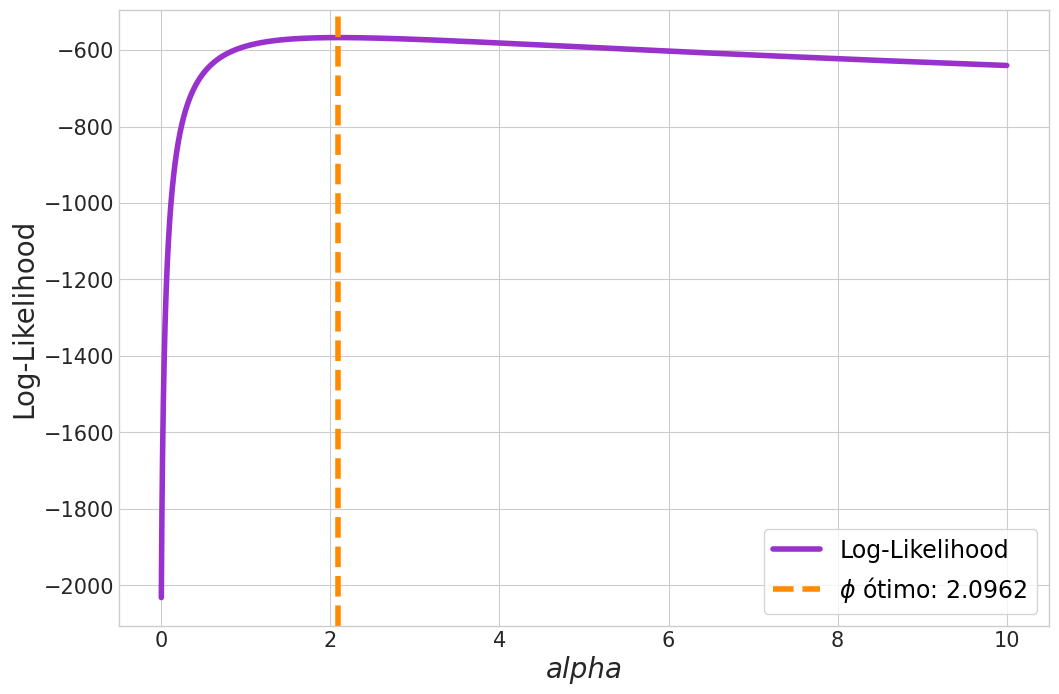

In [10]:
# Plotagem dos resultados (Log-likelihood x fi)

plt.figure(figsize=(12, 8))
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.plot(alphas, llf, label='Log-Likelihood', color='darkorchid', linewidth = 4)
    plt.axvline(x=fi_ótimo, color='darkorange', linewidth = 4, linestyle='dashed',
            label=f'$\phi$ ótimo: {round(fi_ótimo, 4)}')
plt.xlabel('alpha', fontsize=20, style='italic')
plt.ylabel('Log-Likelihood', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right', fontsize=17)
plt.show()

In [11]:
# Reestimação do modelo binomial negativo com o parâmetro 'fi_ótimo'

modelo_bneg = smf.glm(formula='violations ~ staff + post + corruption',
                      data=df_corruption,
                      family=sm.families.NegativeBinomial(alpha=fi_ótimo)).fit()

# Parâmetros do 'modelo_bneg'
print(modelo_bneg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             violations   No. Observations:                  298
Model:                            GLM   Df Residuals:                      294
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -567.40
Date:                Tue, 10 Sep 2024   Deviance:                       239.14
Time:                        19:50:22   Pearson chi2:                     466.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6714
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.9469      0.162     12.050      

In [14]:
# Comparando os modelos Poisson e binomial negativo

summary_col([modelo_poisson, modelo_bneg], 
            model_names=["Poisson","BNeg"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
                })

,Poisson,BNeg
Intercept,2.2127***,1.9469***
,(0.0311),(0.1616)
post[T.yes],-4.2968***,-4.2746***
,(0.1974),(0.2660)
staff,0.0219***,0.0400***
,(0.0012),(0.0089)
corruption,0.3418***,0.4527***
,(0.0275),(0.1146)
Log-lik,-2071.79,-567.40
N,298,298


In [19]:
# Definição da função para realização do teste de razão de verossimilhança

# Definição da função 'lrtest'

def lrtest(modelos):
    modelo_1 = modelos[0]
    llk_1 = modelo_1.llnull
    llk_2 = modelo_1.llf
    
    if len(modelos)>1:
        llk_1 = modelo_1.llf
        llk_2 = modelos[1].llf
    LR_statistic = -2*(llk_1-llk_2)
    p_val = stats.chi2.sf(LR_statistic, 1) # 1 grau de liberdade
    
    print("Likelihood Ratio Test:")
    print(f"-2.(LL0-LLm): {round(LR_statistic, 2)}")
    print(f"p-value: {p_val:.3f}")
    print("")
    print("==================Result======================== \n")
    if p_val <= 0.05:
        print("H1: Different models, favoring the one with the highest Log-Likelihood")
    else:
        print("H0: Models with log-likelihoods that are not statistically different at 95% confidence level")

In [20]:
# Teste de de razão de verossimilhança para comparar as estimações dos
# 'modelo_poisson' e 'modelo_bneg'

lrtest([modelo_poisson, modelo_bneg])

Likelihood Ratio Test:
-2.(LL0-LLm): 3008.79
p-value: 0.000

==================Result======================== 

H1: Different models, favoring the one with the highest Log-Likelihood


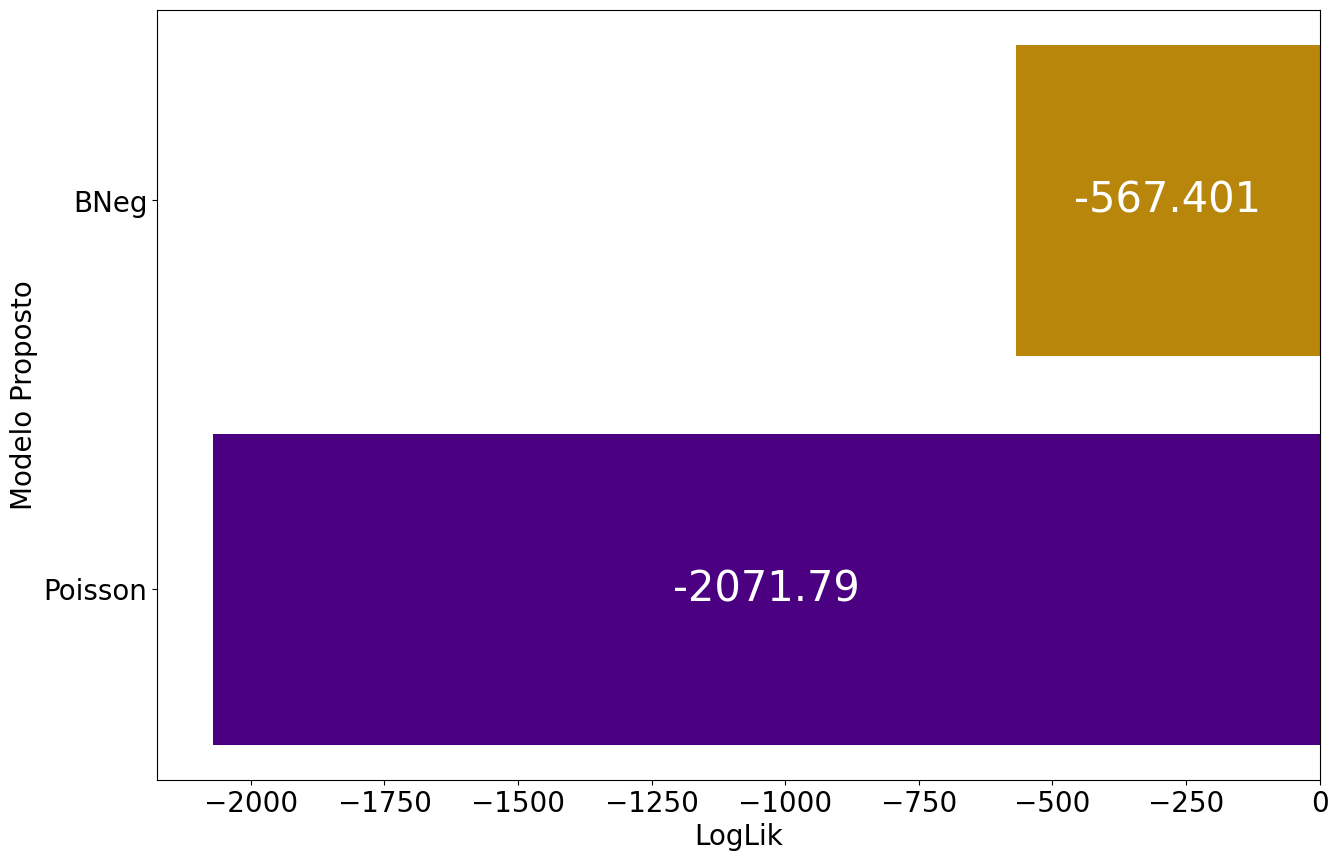

In [21]:
# Gráfico para a comparação dos LogLiks dos modelos Poisson e
# binomial negativo

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo':['Poisson','BNeg'],
                      'loglik':[modelo_poisson.llf, modelo_bneg.llf]})
df_llf

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15,10))

c = ['indigo', 'darkgoldenrod']

ax1 = ax.barh(df_llf.modelo,df_llf.loglik, color = c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)
plt.show()

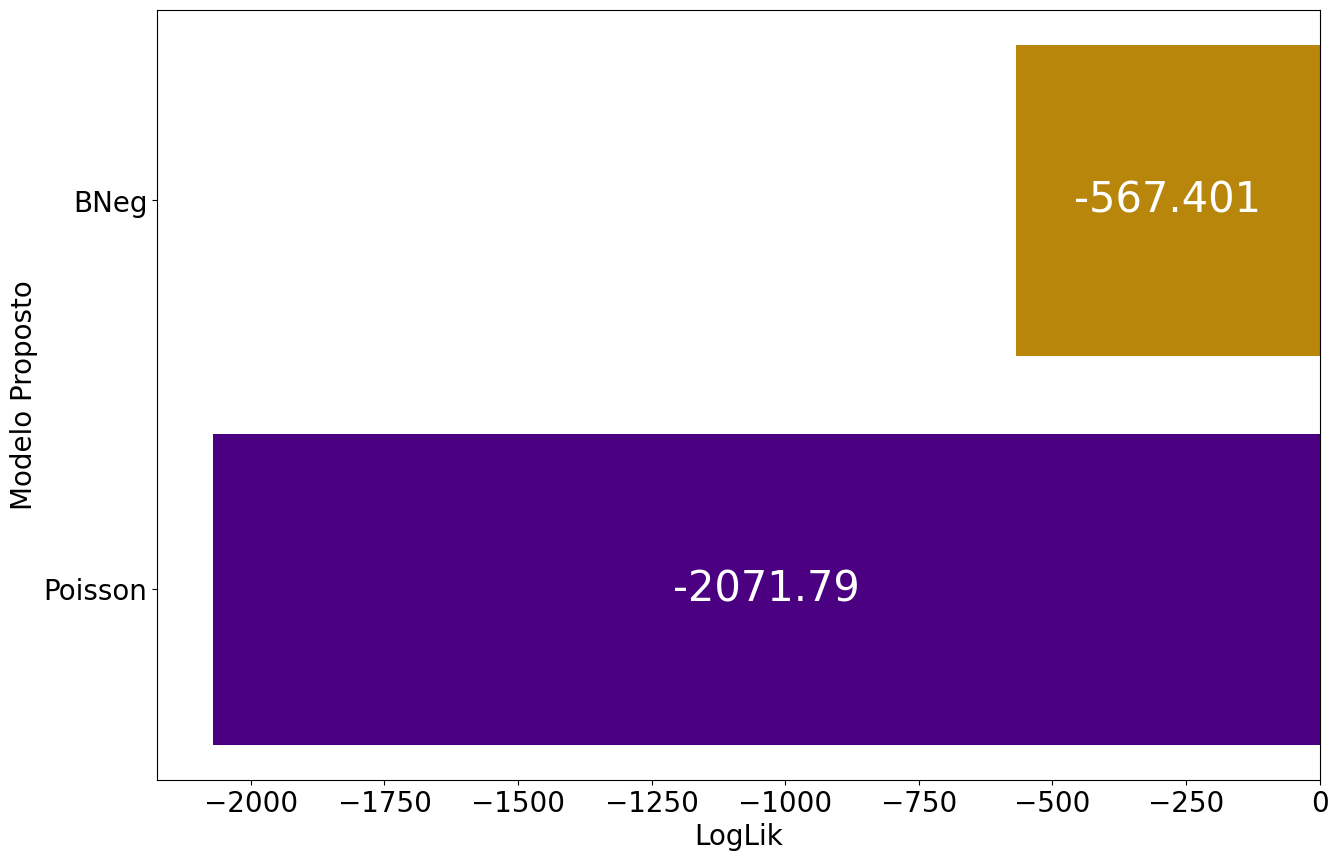

In [22]:
# Gráfico para a comparação dos LogLiks dos modelos Poisson e
# binomial negativo, com JPG para fins didáticos

import urllib.request
from PIL import Image

# Define a URL da imagem
url = "https://i.pinimg.com/474x/80/9b/40/809b40f1c99aec99cccbb53d0dc587c5.jpg"

# Carrega a imagem da URL
imagem = Image.open(urllib.request.urlopen(url))

# Define as dimensões e a posição desejada da imagem
nova_largura = 2000  # Largura da imagem redimensionada
nova_altura = 2000   # Altura da imagem redimensionada
posicao_x = 4500       # Posição horizontal da imagem
posicao_y = 3600       # Posição vertical da imagem

# Redimensiona a imagem
imagem_redimensionada = imagem.resize((nova_largura, nova_altura))

# Definição do dataframe com os modelos e respectivos LogLiks
df_llf = pd.DataFrame({'modelo': ['Poisson', 'BNeg'],
                       'loglik': [modelo_poisson.llf, modelo_bneg.llf]})

# Plotagem propriamente dita
fig, ax = plt.subplots(figsize=(15, 10))

c = ['indigo', 'darkgoldenrod']

ax1 = ax.barh(df_llf.modelo, df_llf.loglik, color=c)
ax.bar_label(ax1, label_type='center', color='white', fontsize=30)
ax.set_ylabel("Modelo Proposto", fontsize=20)
ax.set_xlabel("LogLik", fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', labelsize=20)

# Adiciona a imagem redimensionada em uma posição específica do gráfico
plt.figimage(imagem_redimensionada, posicao_x, posicao_y, zorder=1, alpha=0.73)

# Exibe o gráfico com a imagem
plt.show()

In [23]:
# COMPARAÇÕES ENTRE AS PREVISÕES:

# Qual seria a quantidade média esperada de violações de trânsito para um país
# cujo corpo diplomático seja composto por 23 membros, considerando o período
# anterior à vigência da lei e cujo índice de corrupção seja igual 0.5?

# Modelo Poisson:

modelo_poisson.predict(pd.DataFrame({'staff':[23],
                                     'post':['no'],
                                     'corruption':[0.5]}))

# Modelo binomial negativo:

modelo_bneg.predict(pd.DataFrame({'staff':[23],
                                  'post':['no'],
                                  'corruption':[0.5]}))

0    22.057246
dtype: float64

In [24]:
# Adicionando os fitted values dos modelos estimados até o momento,
# para fins de comparação

# Modelo Poisson:
df_corruption['fitted_poisson'] = modelo_poisson.fittedvalues

# Modelo binomial negativo:
df_corruption['fitted_bneg'] = modelo_bneg.fittedvalues

# Visualização do dataframe com os fitted values do modelos estimados
df_corruption[['country','code','violations','fitted_poisson','fitted_bneg']]

,country,code,violations,fitted_poisson,fitted_bneg
0,Angola,AGO,50,15.919915,16.138592
1,Angola,AGO,1,0.216711,0.224603
2,Albania,ALB,17,13.371720,11.987630
3,Albania,ALB,0,0.182023,0.166834
4,United Arab Emirates,ARE,0,7.477915,5.551770
...,...,...,...,...,...
293,Zaire,ZAR,0,0.243691,0.253810
294,Zambia,ZMB,37,13.486751,12.955688
295,Zambia,ZMB,0,0.183589,0.180306
296,Zimbabwe,ZWE,43,12.994217,13.033499


<function matplotlib.pyplot.show(close=None, block=None)>

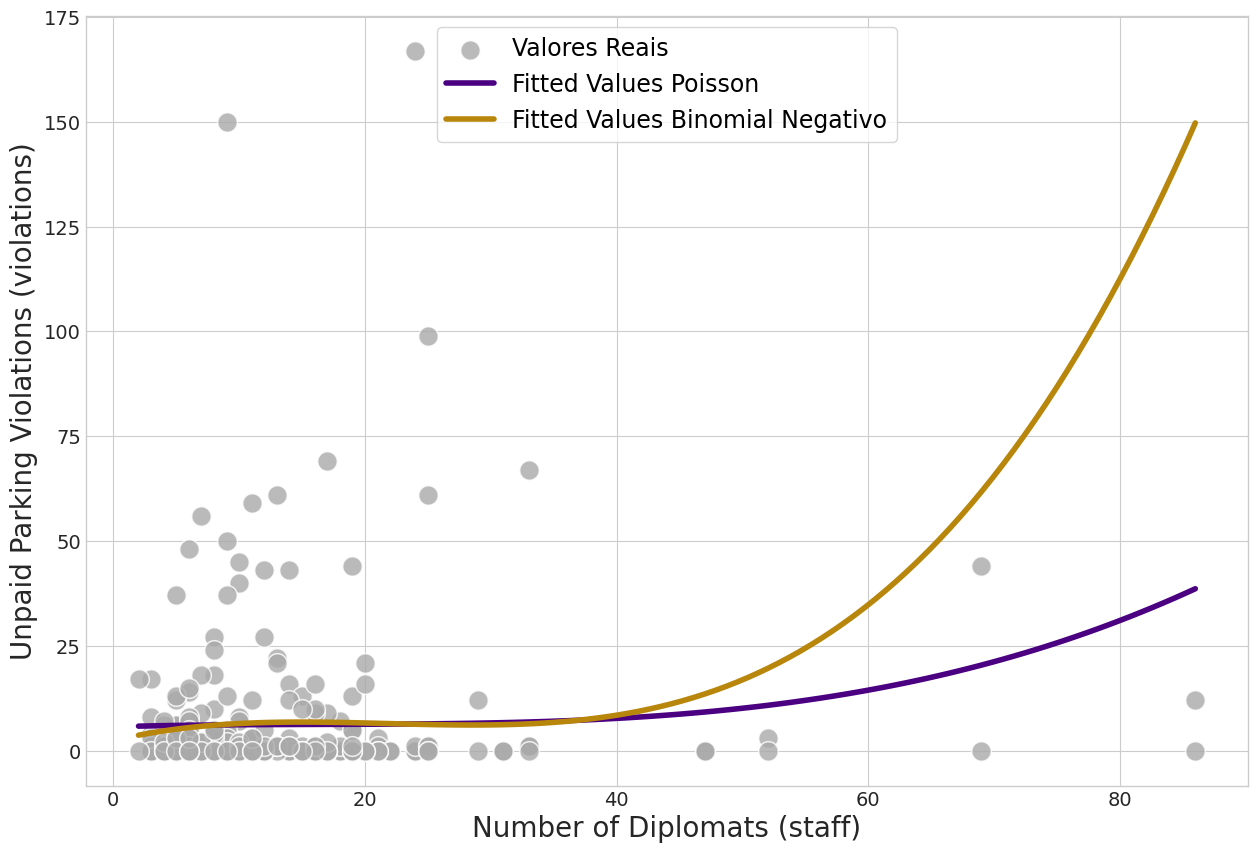

In [25]:
# Fitted values dos modelos Poisson e binomial negativo, considerando,
# para fins didáticos, apenas a variável preditora 'staff'

plt.figure(figsize=(15,10))
with plt.style.context('seaborn-v0_8-whitegrid'):
    sns.scatterplot(x='staff', y='violations', data=df_corruption, color='darkgrey',
                s=200, label='Valores Reais', alpha=0.8)
    sns.regplot(data=df_corruption, x='staff', y='fitted_poisson', order=3, ci=False,
            scatter=False, color='indigo',
            label='Fitted Values Poisson',
            line_kws={'linewidth': 4})
    sns.regplot(data=df_corruption, x='staff', y='fitted_bneg', order=3, ci=False,
            scatter = False, color='darkgoldenrod',
            label='Fitted Values Binomial Negativo',
            line_kws={'linewidth': 4})
plt.xlabel('Number of Diplomats (staff)', fontsize=20)
plt.ylabel('Unpaid Parking Violations (violations)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper center', fontsize=17)
plt.show